# TODO:
- DataTransformer
    - is_test=False - is it needed?
- randomize train/valid split

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Constants

# Sample (get) data

In [2]:
train_df = pd.read_csv('train_data.csv')

In [3]:
valid_df = train_df.sample(frac = 0.2)
train_df = train_df.drop(valid_df.index)

# Explore (visualize) data

In [4]:
train_df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,557522,2007,1928,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [5]:
valid_df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
3806,321238,2007,868,2,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
2875,400000,2007,1387,13,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
616,380530,2007,1519,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
2889,175221,2003,907,7,mixed,individual_heating,management_in_trust,82.0,56.0,5min~10min,15min~20min,2.0,4.0,Chil-sung-market,5,13.0,7.0
449,185840,1993,2337,11,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,20.0,Myung-duk,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,147761,2013,644,13,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
3934,338053,2014,914,16,terraced,individual_heating,management_in_trust,90.0,1174.0,0~5min,0-5min,7.0,20.0,Myung-duk,9,14.0,17.0
3717,371681,2013,907,35,terraced,individual_heating,management_in_trust,8.0,930.0,0~5min,0-5min,6.0,14.0,Kyungbuk_uni_hospital,7,9.0,11.0
1520,194690,2006,818,3,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  3299 non-null   int64  
 1   YearBuilt                  3299 non-null   int64  
 2   Size(sqf)                  3299 non-null   int64  
 3   Floor                      3299 non-null   int64  
 4   HallwayType                3299 non-null   object 
 5   HeatingType                3299 non-null   object 
 6   AptManageType              3299 non-null   object 
 7   N_Parkinglot(Ground)       3299 non-null   float64
 8   N_Parkinglot(Basement)     3299 non-null   float64
 9   TimeToBusStop              3299 non-null   object 
 10  TimeToSubway               3299 non-null   object 
 11  N_manager                  3299 non-null   float64
 12  N_elevators                3299 non-null   float64
 13  SubwayStation              3299 non-null   objec

In [7]:
train_df.nunique()

SalePrice                    781
YearBuilt                     16
Size(sqf)                     86
Floor                         43
HallwayType                    3
HeatingType                    2
AptManageType                  2
N_Parkinglot(Ground)          23
N_Parkinglot(Basement)        20
TimeToBusStop                  3
TimeToSubway                   5
N_manager                      9
N_elevators                   13
SubwayStation                  8
N_FacilitiesInApt              9
N_FacilitiesNearBy(Total)     11
N_SchoolNearBy(Total)         14
dtype: int64

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,3299.0,222013.098212,106223.220156,34070.0,144752.0,209734.0,291150.0,585840.0
YearBuilt,3299.0,2002.951804,8.754854,1978.0,1993.0,2006.0,2007.0,2015.0
Size(sqf),3299.0,960.962110,385.799959,135.0,644.0,910.0,1160.0,2337.0
Floor,3299.0,12.009397,7.571385,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),3299.0,192.259169,216.008136,0.0,11.0,90.0,249.0,713.0
N_Parkinglot(Basement),3299.0,569.816308,409.926804,0.0,184.0,536.0,798.0,1321.0
N_manager,3299.0,6.311306,3.244125,1.0,5.0,6.0,8.0,14.0
N_elevators,3299.0,10.993938,7.728839,0.0,5.0,11.0,16.0,27.0
N_FacilitiesInApt,3299.0,5.812064,2.347436,1.0,4.0,5.0,7.0,10.0
N_FacilitiesNearBy(Total),3299.0,9.861776,3.437697,0.0,8.0,9.0,13.0,16.0


array([[<AxesSubplot: title={'center': 'SalePrice'}>,
        <AxesSubplot: title={'center': 'YearBuilt'}>,
        <AxesSubplot: title={'center': 'Size(sqf)'}>],
       [<AxesSubplot: title={'center': 'Floor'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Ground)'}>,
        <AxesSubplot: title={'center': 'N_Parkinglot(Basement)'}>],
       [<AxesSubplot: title={'center': 'N_manager'}>,
        <AxesSubplot: title={'center': 'N_elevators'}>,
        <AxesSubplot: title={'center': 'N_FacilitiesInApt'}>],
       [<AxesSubplot: title={'center': 'N_FacilitiesNearBy(Total)'}>,
        <AxesSubplot: title={'center': 'N_SchoolNearBy(Total)'}>,
        <AxesSubplot: >]], dtype=object)

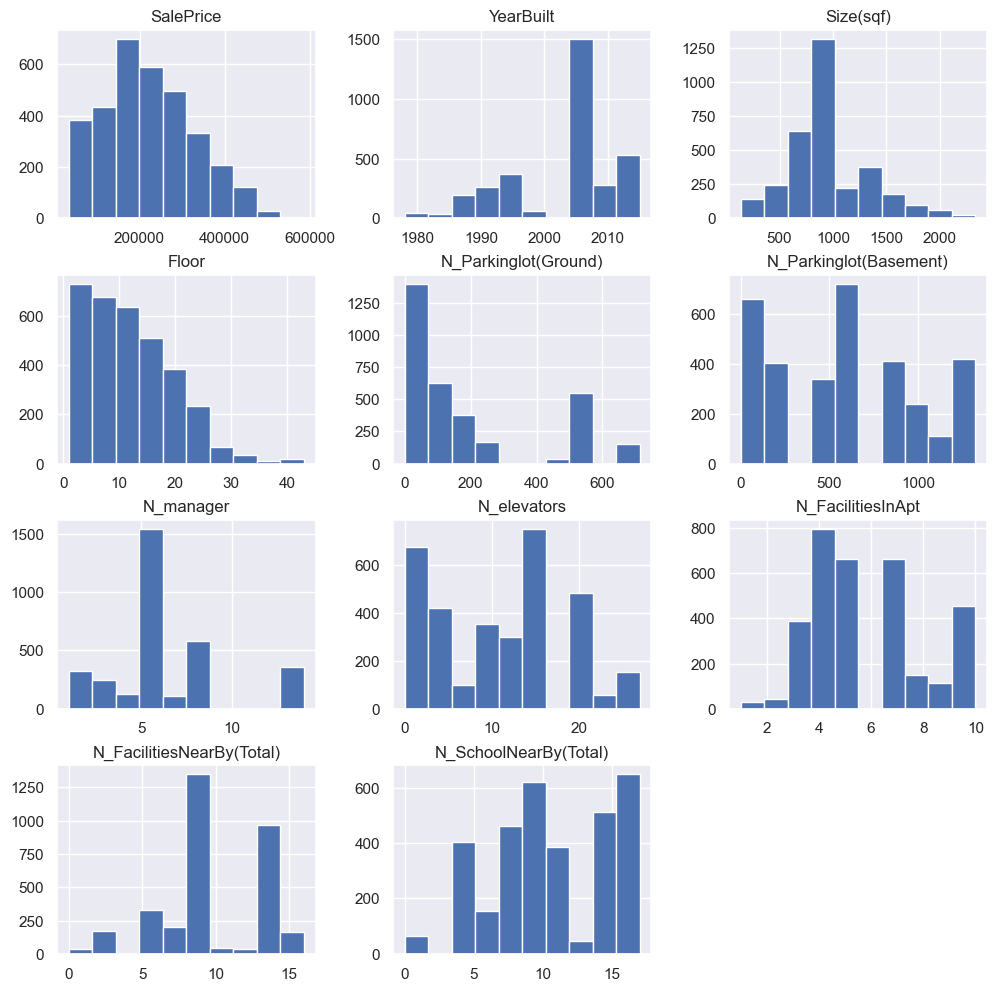

In [9]:
sns.set(rc={'figure.figsize':(12, 12)})  # set figsize
train_df.hist()

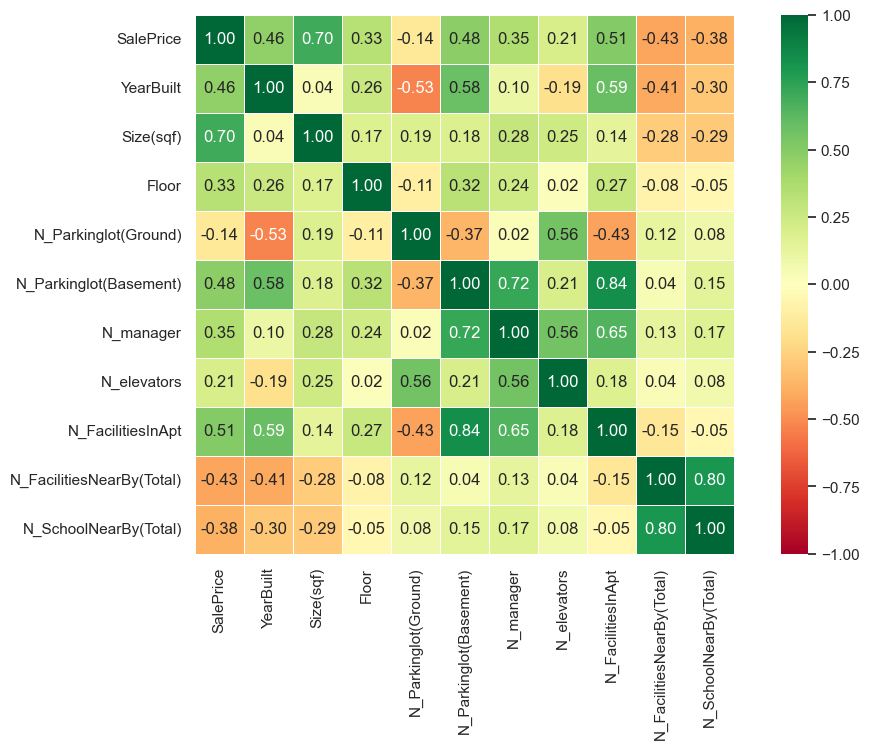

In [10]:
sns.set(rc={'figure.figsize':(12, 7)})  # set figsize
heatmap = sns.heatmap(train_df.corr(numeric_only=True), square=True, cmap='RdYlGn', annot=True, fmt=".2f", linewidth=0.5, vmin=-1, vmax=1)

# Modify data (using pipeline)

In [11]:
# check dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299 entries, 0 to 4123
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SalePrice                  3299 non-null   int64  
 1   YearBuilt                  3299 non-null   int64  
 2   Size(sqf)                  3299 non-null   int64  
 3   Floor                      3299 non-null   int64  
 4   HallwayType                3299 non-null   object 
 5   HeatingType                3299 non-null   object 
 6   AptManageType              3299 non-null   object 
 7   N_Parkinglot(Ground)       3299 non-null   float64
 8   N_Parkinglot(Basement)     3299 non-null   float64
 9   TimeToBusStop              3299 non-null   object 
 10  TimeToSubway               3299 non-null   object 
 11  N_manager                  3299 non-null   float64
 12  N_elevators                3299 non-null   float64
 13  SubwayStation              3299 non-null   objec

In [12]:
# split into X and y
y_train_df = train_df['SalePrice']
X_train_df = train_df.drop(columns='SalePrice')

In [13]:
numerical_features = X_train_df.select_dtypes(exclude='object').columns.tolist()
numerical_features

['YearBuilt',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_manager',
 'N_elevators',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)']

In [14]:
categorical_features = X_train_df.select_dtypes(include='object').columns.tolist()
categorical_features

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
numeric_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

full_processor = ColumnTransformer(transformers=[
    ('numerical', numeric_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [17]:
# y_train = y_train_df.to_numpy()
# y_train.shape

# Model training

In [18]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# model = Lasso(alpha=0.1)
model = RandomForestRegressor()

model_training_pipeline = Pipeline(steps=[
    ('preprocessor', full_processor),
    ('model', model)
])

In [19]:
_ = model_training_pipeline.fit(X_train_df, y_train_df)

# Assess (evaluate the performance of trained models)

In [20]:
# split into X and y
y_valid_df = valid_df['SalePrice']
X_valid_df = valid_df.drop(columns='SalePrice')

In [21]:
preds = model_training_pipeline.predict(X_valid_df)
mean_absolute_error(y_valid_df, preds)

37443.753900631076

In [22]:
mean_squared_error(y_valid_df, preds)

2318856532.33978

In [23]:
model_training_pipeline.score(X_valid_df, y_valid_df)

0.7964400173660482

## Evaluate class predictions

In [24]:
def numerical_into_categorical(x):
    return pd.cut(x=x, bins=[x.min() - 1, 100000, 350000, x.max() + 1], labels=[0,1,2])

In [25]:
train_categorical = numerical_into_categorical(train_df['SalePrice'])
valid_categorical = numerical_into_categorical(valid_df['SalePrice'])
preds_categorical = numerical_into_categorical(preds)
preds_categorical = pd.Series(preds_categorical)

<AxesSubplot: >

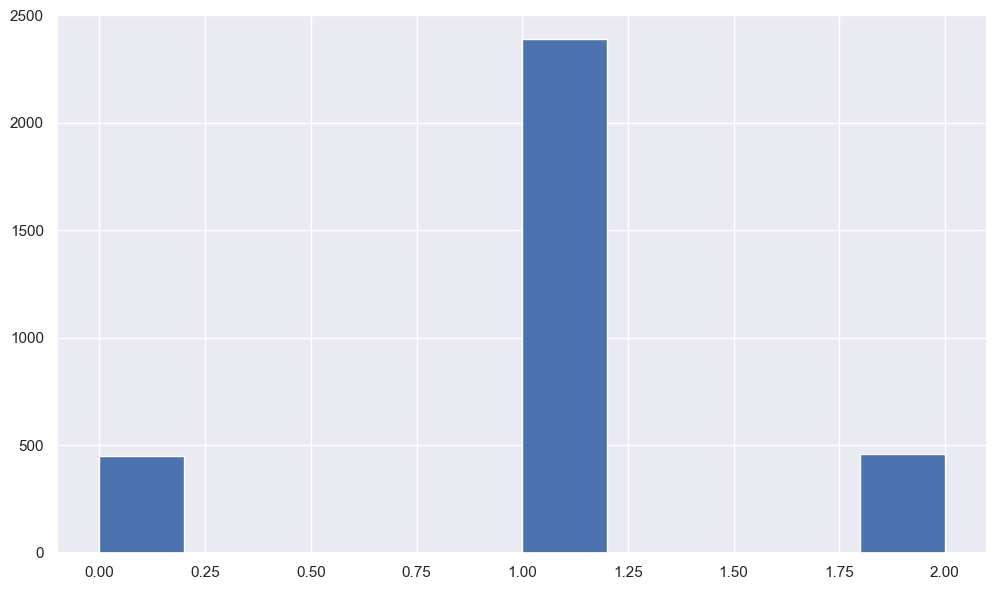

In [26]:
train_categorical.hist()

<AxesSubplot: >

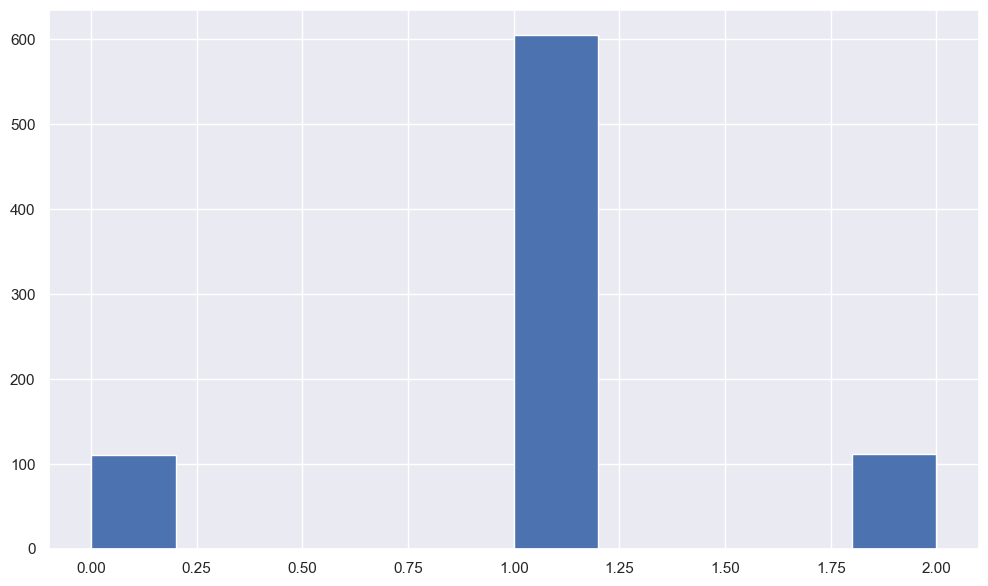

In [27]:
valid_categorical.hist()

<AxesSubplot: >

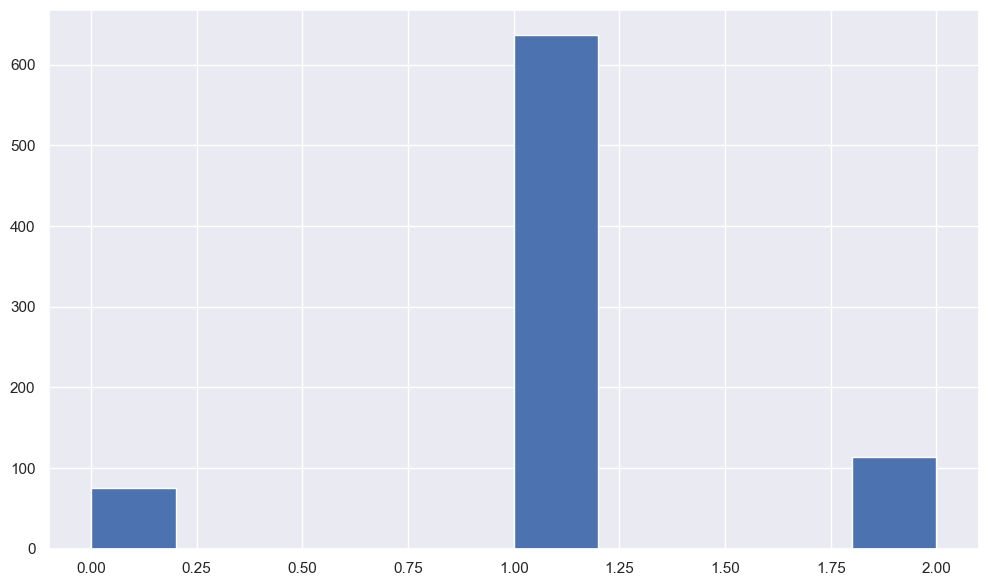

In [28]:
preds_categorical.hist()

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(valid_categorical, preds_categorical)

0.8642424242424243

In [30]:
from sklearn.metrics import classification_report

print(classification_report(valid_categorical, preds_categorical))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       110
           1       0.89      0.93      0.91       604
           2       0.77      0.79      0.78       111

    accuracy                           0.86       825
   macro avg       0.82      0.76      0.78       825
weighted avg       0.86      0.86      0.86       825



## Distribution for test data

In [31]:
test_df = pd.read_csv('test_data.csv')

In [32]:
test_preds = model_training_pipeline.predict(test_df)

In [33]:
categorical_test_preds = numerical_into_categorical(test_preds)
categorical_test_preds = pd.Series(categorical_test_preds)

<AxesSubplot: >

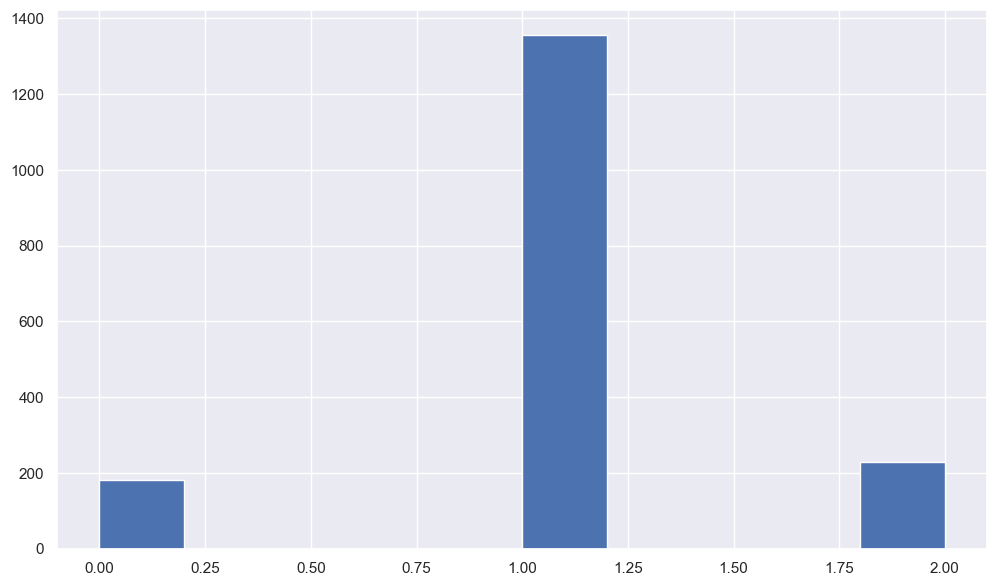

In [34]:
categorical_test_preds.hist()